# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [ ]:
# pip install pandas

In [71]:
# Code Here
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_point, geom_line, labs
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [72]:
dat = pd.read_csv("https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv")

dat.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


The categorical variables here are species, island, and sex. These variables are needed to dummify before to predict bill_depth_mm.

In [73]:
dat['species'] = dat['species'].str.split().str.get(0)

penguins_dummies_df = pd.get_dummies(dat, columns=['species', 'island', 'sex']) #dummifying these variables

penguins_dummies_df


,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,1,39.1,18.7,181.0,3750.0,2007,1,0,0,0,0,1,0,1
1,2,39.5,17.4,186.0,3800.0,2007,1,0,0,0,0,1,1,0
2,3,40.3,18.0,195.0,3250.0,2007,1,0,0,0,0,1,1,0
3,4,NaN,NaN,NaN,NaN,2007,1,0,0,0,0,1,0,0
4,5,36.7,19.3,193.0,3450.0,2007,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,340,55.8,19.8,207.0,4000.0,2009,0,1,0,0,1,0,0,1
340,341,43.5,18.1,202.0,3400.0,2009,0,1,0,0,1,0,1,0
341,342,49.6,18.2,193.0,3775.0,2009,0,1,0,0,1,0,0,1
342,343,50.8,19.0,210.0,4100.0,2009,0,1,0,0,1,0,0,1


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [88]:
# Code Here
penguins = dat.dropna(subset=['bill_length_mm', 'bill_depth_mm'])
X = penguins['bill_length_mm'].values.reshape(-1, 1)
y = penguins['bill_depth_mm'].values

In [89]:
lr = LinearRegression()
lr.fit(X, y)
y_pred_lin = lr.predict(X)

poly2 = PolynomialFeatures(degree=(1,2), include_bias=False)
X_poly2 = poly2.fit_transform(X)
poly2_model = LinearRegression().fit(X_poly2, y)
y_poly2_pred = poly2_model.predict(X_poly2)

poly3 = PolynomialFeatures(degree=(1,3), include_bias=False)
X_poly3 = poly3.fit_transform(X)
poly3_model = LinearRegression().fit(X_poly3, y)
y_poly3_pred = poly3_model.predict(X_poly3)

poly10 = PolynomialFeatures(degree=(1,10), include_bias=False)
X_poly10 = poly10.fit_transform(X)
poly10_model = LinearRegression().fit(X_poly10, y)
y_poly10_pred = poly10_model.predict(X_poly10)

In [90]:
penguins.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


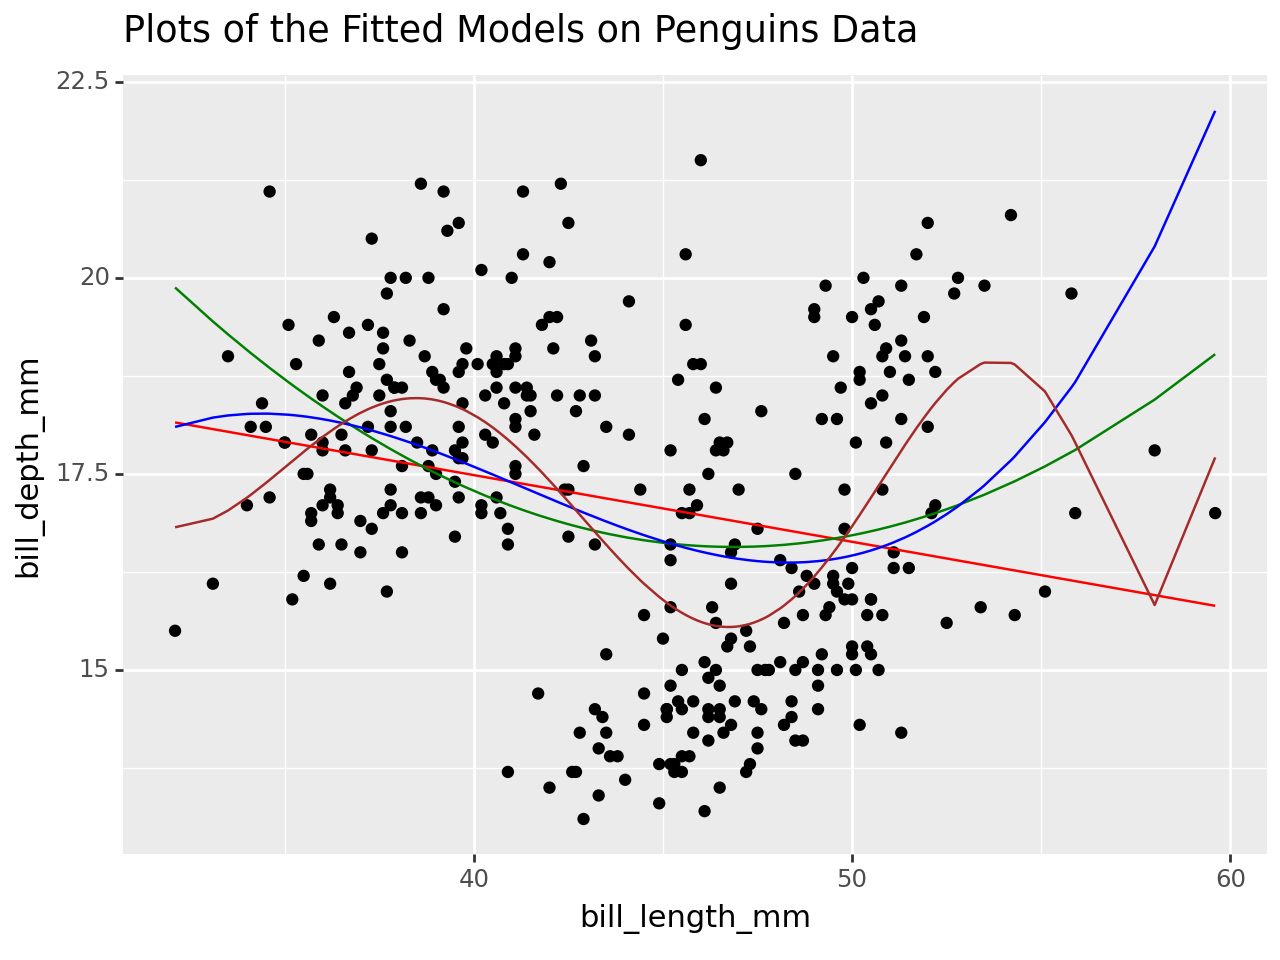

<Figure Size: (640 x 480)>

In [91]:
plot = (ggplot(penguins, aes(x='bill_length_mm', y='bill_depth_mm')) +
        geom_point(color='black') +
        geom_line(aes(y='y_pred_lin'), color='red') +
        geom_line(aes(y='y_poly2_pred'), color='green') +
        geom_line(aes(y='y_poly3_pred'), color='blue') +
        geom_line(aes(y='y_poly10_pred'), color='brown') +
        labs(title='Plots of the Fitted Models on Penguins Data'))

plot

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The linear model is underfitting due to the the line unable to capture all the data in a line. This shows that the relation between bill length and bill depth is non-linear

The degree 10 polynomial is overfitting as the line is trying to fit individual data points which makes it fit too perfectly for the training data, this results in poor predictions for new values.

The quadratic or the cubic models fit the data the best as these two models follow the trend of the overall data without overfitting or underfitting